# Filtro de Wiener Adaptativo Pontual

## Índice

1. Introdução
2. Importação de bibliotecas
3. Filtro de Wiener Adaptativo Pontual

---

## 1. Introdução

- Feito por: Kenzo Inanami de Faria <br>
- Objetivo:
  1. Implementar o algoritmo do filtro de Wiener adaptativo pontual para a imagem: https://links.uwaterloo.ca/Repository/TIF/boat.tif
  2. Usar os tamanhos de janela 5x5 e 7x7 para comparar os resultados
- Algoritmo:

  1. Ler imagem do arquivo para memória
  2. Normalizar imagem: dividir o valor de cada pixel pelo máximo da imagem
  3. Criar uma imagem s da mesma dimensão de f com zeros
  4. Para todo pixel p(i,j) da imagem:

     - Computar a média dos valores da janela ao redor de p(i,j): μf
     - Computar a variância dos valores da janela ao redor de p(i,j): σf^2
     - Computar o valor da variância do sinal/imagem sem ruído
     - Computar o pixel livre de ruído

  5. Salvar imagem s em arquivo de saída


---

## 2. Importar bibliotecas


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

## 3. Filtro de Wiener Adaptativo Pontual


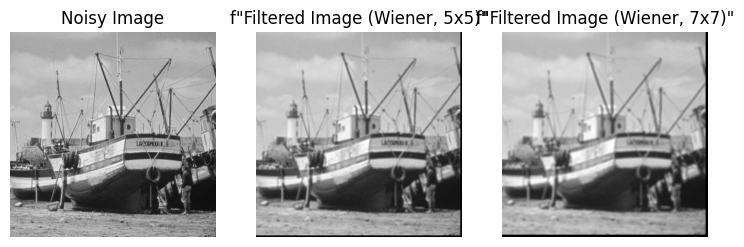

In [ ]:
def add_gaussian_noise(image, mean=0, variance=10):
  noise = np.random.normal(mean, variance ** 0.5, image.shape)
  noisy_image = image + noise

  return noisy_image

def wiener_filter(image, kernel_size, noise_variance):
  # 2. Normalizar imagem
  max = 0
  aux = 0
  for line in image:
    aux = np.max(line)
    if aux>max:
      max = aux
  for line in image:
    for pixel in image:
      pixel = pixel/max
  padded_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)
  # 3. Criar uma imagem s da mesma dimensão de f com zeros
  s = np.zeros(padded_image.shape)

  # 4.
  for i in range(image.shape[0]):
    for j in range(image.shape[0]):
      window = padded_image[i:i+kernel_size, j:j+kernel_size]
      # Computar a média e variância da janela
      mean = np.mean(window)
      var = np.var(window)
      # Computar o valor da variância do sinal/imagem sem ruído
      var_s = min(var-noise_variance,0)
      # Computar o pixel livre de ruído
      s[i][j] = mean + (var_s/(var_s-noise_variance))*(padded_image[i][j]-mean)


  return s

# 1. Carregar a imagem
image = cv2.imread('Imagens/boat.tif', cv2.IMREAD_GRAYSCALE)

if image is None:
  print("Imagem não foi lida, confira se o nome e extensão estão corretos")
  sys.exit(0)

# Gerando ruído gaussiano de variancia 10 e média 0
noise_variance =10
noisy_image = add_gaussian_noise(image,0,noise_variance)

# Aplicar o filtro de Wiener adaptativo pontual com janelas de tamanho 5x5 e 7x7
wiener1 = wiener_filter(noisy_image, 5, noise_variance)
wiener2 = wiener_filter(noisy_image, 7, noise_variance)

#Mostrando as imagens
fig, ax = plt.subplots(1,3, figsize=(9, 6))

# Inserindo a original para comparação
ax.ravel()[0].imshow(noisy_image, cmap=plt.cm.gray)
ax.ravel()[0].set_title(f"Noisy Image")
ax.ravel()[0].axis('off')

ax.ravel()[1].imshow(wiener1, cmap=plt.cm.gray)
ax.ravel()[1].set_title('f"Filtered Image (Wiener, 5x5)"')
ax.ravel()[1].axis('off')
ax.ravel()[2].imshow(wiener2, cmap=plt.cm.gray)
ax.ravel()[2].set_title('f"Filtered Image (Wiener, 7x7)"')
ax.ravel()[2].axis('off')
plt.plot(10, 10)
plt.show()
